In [2]:
#import necessary modules
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [6]:
#import google translator module
from deep_translator import GoogleTranslator

In [126]:
#load csv file
#df_march = pd.read_excel('Ladesaeuleninfrastruktur.xlsx', skiprows=5)
#df_aug = pd.read_excel('Ladesaeulenregister_august.xlsx', skiprows=10,encoding="iso-8859-1")
df = pd.read_csv('https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/E_Mobilitaet/Ladesaeulenregister_CSV.csv?__blob=publicationFile&v=38', encoding='iso-8859-1', sep=';', skiprows=10)

In [127]:
df.head()

,Betreiber,Straße,Hausnummer,Adresszusatz,Postleitzahl,Ort,Bundesland,Kreis/kreisfreie Stadt,Breitengrad,Längengrad,...,Public Key1,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4
0,EnBW mobility+ AG und Co.KG,Singener Str.,16,NaN,78267,Aach,Baden-Württemberg,Landkreis Konstanz,"47,8408806","8,8528868",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Restaurant & Hotel Wilder Mann (Einzelunterneh...,Karlstraße,2-4,NaN,73433,Aalen,Baden-Württemberg,Landkreis Ostalbkreis,"48,860174","10,103014",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Landratsamt Ostalbkreis,Stuttgarter Str.,41,NaN,73430,Aalen,Baden-Württemberg,Landkreis Ostalbkreis,"48,834432","10,094287",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EnBW ODR AG,Stuttgarter Straße,41,hinter Landratsamt,73430,Aalen,Baden-Württemberg,Landkreis Ostalbkreis,"48,834466","10,094306",...,3059301306072A8648CE3D020106082A8648CE3D030107...,AC Steckdose Typ 2,22,3059301306072A8648CE3D020106082A8648CE3D030107...,AC Steckdose Typ 2,22,3059301306072A8648CE3D020106082A8648CE3D030107...,AC Steckdose Typ 2,22,3059301306072A8648CE3D020106082A8648CE3D030107...
4,EnBW ODR AG,Borsigstraße,999,Parkplatz Franke GmbH,73431,Aalen,Baden-Württemberg,Landkreis Ostalbkreis,"48,828664","10,082773",...,3059301306072A8648CE3D020106082A8648CE3D030107...,AC Kupplung Typ 2,11,3059301306072A8648CE3D020106082A8648CE3D030107...,AC Kupplung Typ 2,11,3059301306072A8648CE3D020106082A8648CE3D030107...,AC Kupplung Typ 2,11,3059301306072A8648CE3D020106082A8648CE3D030107...


In [128]:
df.shape

(33578, 26)

In [129]:
#translate data to English
#deep translator syntax
GoogleTranslator(source='auto', target='en').translate("Ort") 

'Ort'

In [130]:
#translate to english
df.rename(columns=lambda x: GoogleTranslator(source='auto', target='en').translate(x),inplace=True)

In [131]:
df.head(2)

,operator,Street,House number,address supplement,postal code,Ort,Federal State,District/district-free city,latitude,longitude,...,Public Key1,Connector Types2,P2 [kW],Public Key2,Connector Types3,P3 [kW],Public Key3,Connector Types4,P4 [kW],Public Key4
0,EnBW mobility+ AG und Co.KG,Singener Str.,16,NaN,78267,Aach,Baden-Württemberg,Landkreis Konstanz,"47,8408806","8,8528868",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Restaurant & Hotel Wilder Mann (Einzelunterneh...,Karlstraße,2-4,NaN,73433,Aalen,Baden-Württemberg,Landkreis Ostalbkreis,"48,860174","10,103014",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
#rename columns
df.rename(columns={'normal charging device':'type_of_charger',
                  'address_supplement':'additional_address',
                  'Ort':'Place'},inplace=True)

In [133]:
#replace spaces with hyphens
df.rename(columns=lambda x: x.replace(" ","_"),inplace=True)

In [134]:
#unique charger types
df.type_of_charger.unique()

array(['Normalladeeinrichtung', 'Schnellladeeinrichtung', nan],
      dtype=object)

In [135]:
#translate charger types
GoogleTranslator(source='auto', target='en').translate('Normalladeeinrichtung') 

'normal charging device'

In [136]:
#replace existing names with translations
df.type_of_charger.replace({'Normalladeeinrichtung':'Normal','Schnellladeeinrichtung':'Fast'} ,inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33578 entries, 0 to 33577
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   operator                     33578 non-null  object
 1   Street                       33578 non-null  object
 2   House_number                 33578 non-null  object
 3   address_supplement           4603 non-null   object
 4   postal_code                  33578 non-null  int64 
 5   Place                        33578 non-null  object
 6   Federal_State                33578 non-null  object
 7   District/district-free_city  33578 non-null  object
 8   latitude                     33578 non-null  object
 9   longitude                    33578 non-null  object
 10  commissioning_date           33578 non-null  object
 11  connected_load               33578 non-null  object
 12  type_of_charger              33577 non-null  object
 13  number_of_charging_points    33

In [138]:
df.columns

Index(['operator', 'Street', 'House_number', 'address_supplement',
       'postal_code', 'Place', 'Federal_State', 'District/district-free_city',
       'latitude', 'longitude', 'commissioning_date', 'connected_load',
       'type_of_charger', 'number_of_charging_points', 'Connector_Types1',
       'P1_[kW]', 'Public_Key1', 'Connector_Types2', 'P2_[kW]', 'Public_Key2',
       'Connector_Types3', 'P3_[kW]', 'Public_Key3', 'Connector_Types4',
       'P4_[kW]', 'Public_Key4'],
      dtype='object')

In [139]:
# replace null values by 0
columns_na = ['Connector_Types1',
       'P1_[kW]', 'Connector_Types2', 'P2_[kW]',
       'Connector_Types3', 'P3_[kW]', 'Connector_Types4',
       'P4_[kW]']

for column in columns_na:
    df[column] = df[column].fillna(value='0')

In [140]:
#view null values
df.isnull().sum()

operator                           0
Street                             0
House_number                       0
address_supplement             28975
postal_code                        0
Place                              0
Federal_State                      0
District/district-free_city        0
latitude                           0
longitude                          0
commissioning_date                 0
connected_load                     0
type_of_charger                    1
number_of_charging_points          0
Connector_Types1                   0
P1_[kW]                            0
Public_Key1                    30402
Connector_Types2                   0
P2_[kW]                            0
Public_Key2                    30924
Connector_Types3                   0
P3_[kW]                            0
Public_Key3                    33420
Connector_Types4                   0
P4_[kW]                            0
Public_Key4                    33462
dtype: int64

In [141]:
#df.drop(columns=['Public_Key1', 'Public_Key2', 'Public_Key3', 'Public_Key4'], inplace=True)

In [142]:
df.dtypes

operator                       object
Street                         object
House_number                   object
address_supplement             object
postal_code                     int64
Place                          object
Federal_State                  object
District/district-free_city    object
latitude                       object
longitude                      object
commissioning_date             object
connected_load                 object
type_of_charger                object
number_of_charging_points       int64
Connector_Types1               object
P1_[kW]                        object
Public_Key1                    object
Connector_Types2               object
P2_[kW]                        object
Public_Key2                    object
Connector_Types3               object
P3_[kW]                        object
Public_Key3                    object
Connector_Types4               object
P4_[kW]                        object
Public_Key4                    object
dtype: objec

In [143]:
#this column has a value containing spaces
df['P4_[kW]'].unique()

array(['0', '22', '11', '43', '100', '3,6', '16', '150', '3,7', '7,2',
       '300', '3', '180', '225', '75', '50', '37,5', '30', '320', '22,1',
       '2,3', '                 ', '44', '18', '7', '7,5'], dtype=object)

In [144]:
#replace commas with points
df['P4_[kW]'] = df['P4_[kW]'].str.replace(',','.')

In [145]:
#replace spaces with 0 and data type to float
df['P4_[kW]'] = df['P4_[kW]'].str.replace('                 ','0')
df['P4_[kW]'] = df['P4_[kW]'].astype('float')

In [146]:
#cast the res which have no issues to float
type_replace =  ['longitude', 'latitude', 'connected_load', 'P1_[kW]', 'P2_[kW]', 'P3_[kW]']

for col in type_replace:
    df[col] = df[col].str.replace(',','.').astype('float')

In [147]:
df.dtypes

operator                        object
Street                          object
House_number                    object
address_supplement              object
postal_code                      int64
Place                           object
Federal_State                   object
District/district-free_city     object
latitude                       float64
longitude                      float64
commissioning_date              object
connected_load                 float64
type_of_charger                 object
number_of_charging_points        int64
Connector_Types1                object
P1_[kW]                        float64
Public_Key1                     object
Connector_Types2                object
P2_[kW]                        float64
Public_Key2                     object
Connector_Types3                object
P3_[kW]                        float64
Public_Key3                     object
Connector_Types4                object
P4_[kW]                        float64
Public_Key4              

In [148]:
#parse commisioning date to datetime
df['commissioning_date'] = pd.to_datetime(df['commissioning_date'], format='%d.%m.%Y')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33578 entries, 0 to 33577
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   operator                     33578 non-null  object        
 1   Street                       33578 non-null  object        
 2   House_number                 33578 non-null  object        
 3   address_supplement           4603 non-null   object        
 4   postal_code                  33578 non-null  int64         
 5   Place                        33578 non-null  object        
 6   Federal_State                33578 non-null  object        
 7   District/district-free_city  33578 non-null  object        
 8   latitude                     33578 non-null  float64       
 9   longitude                    33578 non-null  float64       
 10  commissioning_date           33578 non-null  datetime64[ns]
 11  connected_load               33578 non-nu

In [152]:
#check for leading or laggging spaces
df.Place[df.Place.str.startswith(' ') | df.Place.str.endswith(' ')].unique()


array(['Berg / Neumarkt ', 'Schöneiche ', 'Lübstorf ', 'Hannover ',
       'Lehrte ', ' Hamminkeln', 'Herne ', 'Trier ', 'Halle/Saale '],
      dtype=object)

In [155]:
#select columns
string_data = df.select_dtypes(include='object').columns
string_data

Index(['operator', 'Street', 'House_number', 'address_supplement', 'Place',
       'Federal_State', 'District/district-free_city', 'type_of_charger',
       'Connector_Types1', 'Public_Key1', 'Connector_Types2', 'Public_Key2',
       'Connector_Types3', 'Public_Key3', 'Connector_Types4', 'Public_Key4'],
      dtype='object')

In [156]:
#remove leading and lagging spaces
for column in string_data:
    df[column] = df[column].str.strip()

In [157]:
#confirm there are no spaces leading or lagging white spaces
(df.Place.str.startswith(' ') | df.Place.str.endswith(' ')).any()

False

In [158]:
#check for duplicates for frankfurt
df.Place[df.Place.str.contains('Frankfurt')].unique()

array(['Frankfurt (Oder)', 'Frankfurt/Oder', 'Frankfurt',
       'Frankfurt am Main', 'Frankfurt-Nieder-Eschbach',
       'Frankfurt-Niederrad'], dtype=object)

In [159]:
#check for duplicates for stuttgart
df.Place[df.Place.str.contains('Stuttgart')].unique()

array(['Stuttgart', 'Stuttgart-Feuerbach', 'Stuttgart-Mitte',
       'Stuttgart-Möhringen', 'Stuttgart-Mühlhausen',
       'Stuttgart-Obertürkheim'], dtype=object)

In [162]:
# scrap a table containing German cities
html_data=requests.get('http://www.citymayors.com/gratis/german_topcities.html').text

In [163]:
# grab the relevant tables
soup=BeautifulSoup(html_data, "html.parser")
data=pd.read_html (str(soup))
df_cities=data[1]
df_cities.head()

,0,1,2,3
0,Rank,City,State,Population
1,1,Berlin,Berlin,3275000
2,2,Hamburg,Hamburg,1686100
3,3,München,Bavaria,1185400
4,4,Köln,Northrhine-Westfalia,965300


In [164]:
df_cities.columns = df_cities.iloc[0]

In [165]:
df_cities = df_cities.iloc[1:16,:]

In [300]:
df_cities

,Rank,City,State,Population
1,1,Berlin,Berlin,3275000
2,2,Hamburg,Hamburg,1686100
3,3,München,Bavaria,1185400
4,4,Köln,Northrhine-Westfalia,965300
5,5,Frankfurt,Hessen,648000
6,6,Essen,Northrhine-Westfalia,588800
7,7,Dortmund,Northrhine-Westfalia,587600
8,8,Stuttgart,Baden-Württemberg,581100
9,9,Düsseldorf,Northrhine-Westfalia,568900
10,10,Bremen,Bremen,527900


In [301]:
#d.Place[df.Place.str.contains(df_cities.City)]

In [302]:
lst1=[]
for city in df_cities.City:
    lst1.append(list((df.Place[df.Place.str.contains(city)].unique(),city)))

In [303]:
for l1 in lst1:
    print(l1)
    print('\n')

[array(['Berlin', 'Berlin (Tempelhof)', 'Berlin-Friedrichsfelde',
       'Berlin-Köpenick', 'Berlin-Marzahn-Hellersdorf', 'Berlin-Pankow',
       'Berlin-Reinickendorf', 'Berlin-Spandau', 'Berlin Hönow',
       'Neuenhagen bei Berlin', 'Rüdersdorf bei Berlin'], dtype=object), 'Berlin']


[array(['Hamburg', 'Hamburg/ Moorfleet', 'Hamburg-Duvenstedt',
       'Hamburg-Eidelstedt', 'Hamburg-Wandsbeck'], dtype=object), 'Hamburg']


[array(['Garching b. München', 'Garching bei München',
       'Grafing bei München', 'Kirchheim bei München', 'München',
       'München - Neufriedenheim', 'München Flughafen', 'München Nord',
       'München Sendling', 'München-Flughafen', 'München-Freiham',
       'Puchheim b. München'], dtype=object), 'München']


[array(['Köln', 'Köln Braunsfeld', 'Köln Deutz', 'Köln Ehrenfeld',
       'Köln Porz', 'Köln-Merheim', 'Köln-Pesch', 'Köln-Poll'],
      dtype=object), 'Köln']


[array(['Frankfurt (Oder)', 'Frankfurt/Oder', 'Frankfurt',
       'Frankfurt am Main', '

In [317]:
top_cities = [city for city in df_cities.City]
top_cities

['Berlin',
 'Hamburg',
 'München',
 'Köln',
 'Frankfurt',
 'Essen',
 'Dortmund',
 'Stuttgart',
 'Düsseldorf',
 'Bremen',
 'Hannover',
 'Duisburg',
 'Nürnberg',
 'Leipzig',
 'Dresden']

In [306]:
for l in lst1:
    if l[1] not in ['Frankfurt', 'Essen']:
        df.replace(dict.fromkeys(list(l[0]),l[1]),inplace=True)

In [308]:
df.Place[df.Place.str.contains('Frankfurt')].unique()

array(['Frankfurt (Oder)', 'Frankfurt/Oder', 'Frankfurt',
       'Frankfurt am Main', 'Frankfurt-Nieder-Eschbach',
       'Frankfurt-Niederrad'], dtype=object)

In [312]:
df.Place.replace(dict.fromkeys(['Frankfurt','Frankfurt am Main', 
                          'Frankfurt-Nieder-Eschbach','Frankfurt-Niederrad'], 'Frankfurt'),inplace=True)

In [313]:
df.Place[df.Place.str.contains('Frankfurt')].unique()

array(['Frankfurt (Oder)', 'Frankfurt/Oder', 'Frankfurt'], dtype=object)

In [314]:
df.Place[df.Place.str.contains('Essen')].unique()


array(['Essenbach', 'Essenbach/Oberahrain', 'Essen', 'Addrup-Essen/Oldb.',
       'Bad Essen', 'Essen (Oldenburg)', 'Essen-Kettwig', 'Essenheim'],
      dtype=object)

In [315]:
df.Place.replace(dict.fromkeys(['Essen (Oldenburg)','Essen'], 'Essen'),inplace=True)

In [335]:
df[df.Place.isin(top_cities)]

,operator,Street,House_number,address_supplement,postal_code,Place,Federal_State,District/district-free_city,latitude,longitude,...,Public_Key1,Connector_Types2,P2_[kW],Public_Key2,Connector_Types3,P3_[kW],Public_Key3,Connector_Types4,P4_[kW],Public_Key4
4417,Allego GmbH,Ulmer Straße,225,NaN,70327,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.778395,9.233296,...,NaN,AC Kupplung Typ 2,43.0,NaN,0,0.0,NaN,0,NaN,NaN
4418,Allego GmbH,Heilbronner Straße,392,NaN,70469,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.822000,9.175000,...,NaN,AC Kupplung Typ 2,43.0,NaN,0,0.0,NaN,0,NaN,NaN
4419,ALDI SÜD,Galilei Straße,7,NaN,70565,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.720890,9.119800,...,NaN,0,0.0,NaN,0,0.0,NaN,0,NaN,NaN
4420,ALDI SÜD,Heimsheimer Straße,34,NaN,70499,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.821270,9.098740,...,NaN,0,0.0,NaN,0,0.0,NaN,0,NaN,NaN
4421,ALDI SÜD,Adalbert-Stifter-Str.,101,NaN,70437,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.835680,9.201707,...,NaN,0,0.0,NaN,0,0.0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29829,Fraunhofer-Gesellschaft zur Förderung der ange...,Perlickstraße,1,Fraunhofer IZI - Leipzig,4103,Leipzig,Sachsen,Kreisfreie Stadt Leipzig,51.319598,12.396173,...,NaN,0,0.0,NaN,0,0.0,NaN,0,NaN,NaN
29830,Fraunhofer-Gesellschaft zur Förderung der ange...,Perlickstraße,1,Fraunhofer IZI - Leipzig,4103,Leipzig,Sachsen,Kreisfreie Stadt Leipzig,51.319598,12.396173,...,NaN,"DC Kupplung Combo, DC CHAdeMO",32.0,NaN,AC Steckdose Typ 2,22.0,NaN,0,NaN,NaN
29831,Kaufland,Georg-Schumann-Straße,105-109,NaN,4155,Leipzig,Sachsen,Kreisfreie Stadt Leipzig,51.362434,12.362360,...,NaN,"DC Kupplung Combo, DC CHAdeMO",50.0,NaN,0,0.0,NaN,0,NaN,NaN
29832,EWE Go GmbH,Handelsstraße,1,NaN,4356,Leipzig,Sachsen,Kreisfreie Stadt Leipzig,51.399757,12.401102,...,NaN,DC Kupplung Combo,150.0,NaN,AC Steckdose Typ 2,22.0,NaN,0,NaN,NaN


In [323]:
df.duplicated().sum()

4128

In [326]:
df.Federal_State.unique()

array(['Mecklenburg-Vorpommern', 'Baden-Württemberg', 'Bayern', 'Berlin',
       'Brandenburg', 'Bremen', 'Hamburg', 'Hessen', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

Text(0, 0.5, 'Number')

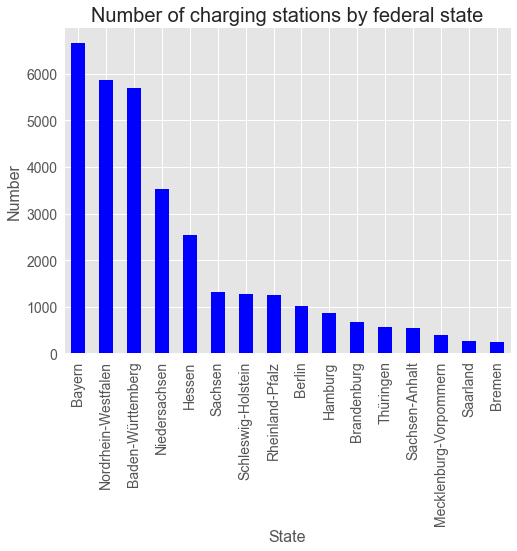

In [347]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

# number of charging station per federal state
df.Federal_State.value_counts().plot(kind='bar', color='blue', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of charging stations by federal state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

Text(0, 0.5, 'Number')

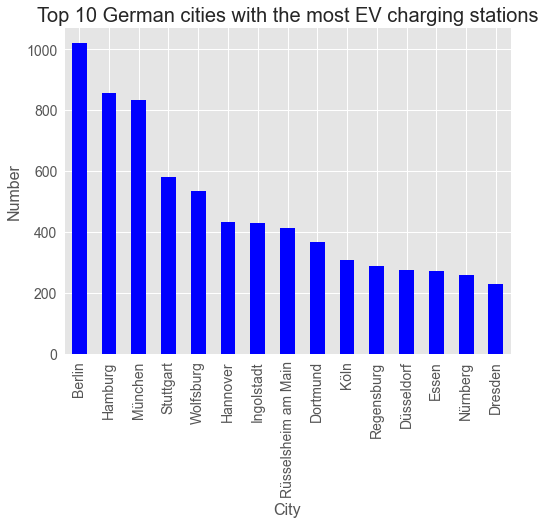

In [348]:
# German cities with the most EV charging stations
df.Place.value_counts().head(15).plot(kind='bar', color='blue', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Top 10 German cities with the most EV charging stations', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number', fontsize=16)

In [349]:
#List of top cities in germany
df[df.Place.isin(top_cities)].head()

,operator,Street,House_number,address_supplement,postal_code,Place,Federal_State,District/district-free_city,latitude,longitude,...,Public_Key1,Connector_Types2,P2_[kW],Public_Key2,Connector_Types3,P3_[kW],Public_Key3,Connector_Types4,P4_[kW],Public_Key4
4417,Allego GmbH,Ulmer Straße,225,NaN,70327,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.778395,9.233296,...,NaN,AC Kupplung Typ 2,43.0,NaN,0,0.0,NaN,0,NaN,NaN
4418,Allego GmbH,Heilbronner Straße,392,NaN,70469,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.822000,9.175000,...,NaN,AC Kupplung Typ 2,43.0,NaN,0,0.0,NaN,0,NaN,NaN
4419,ALDI SÜD,Galilei Straße,7,NaN,70565,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.720890,9.119800,...,NaN,0,0.0,NaN,0,0.0,NaN,0,NaN,NaN
4420,ALDI SÜD,Heimsheimer Straße,34,NaN,70499,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.821270,9.098740,...,NaN,0,0.0,NaN,0,0.0,NaN,0,NaN,NaN
4421,ALDI SÜD,Adalbert-Stifter-Str.,101,NaN,70437,Stuttgart,Baden-Württemberg,Stadtkreis Stuttgart,48.835680,9.201707,...,NaN,0,0.0,NaN,0,0.0,NaN,0,NaN,NaN


Text(0, 0.5, 'Number')

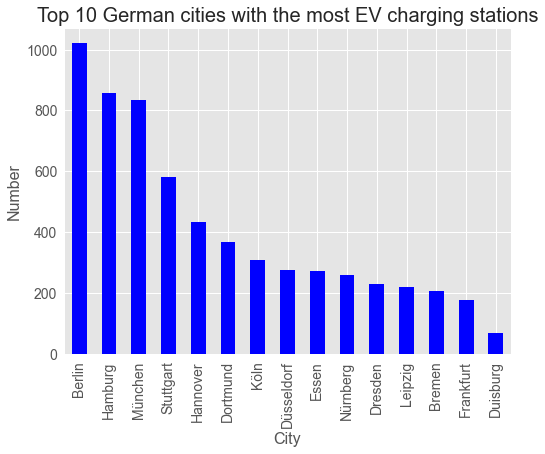

In [350]:
df_topcities= df[df.Place.isin(top_cities)]
# top German cities with the most EV charging stations
df_topcities.Place.value_counts().plot(kind='bar', color='blue', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Top 10 German cities with the most EV charging stations', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number', fontsize=16)

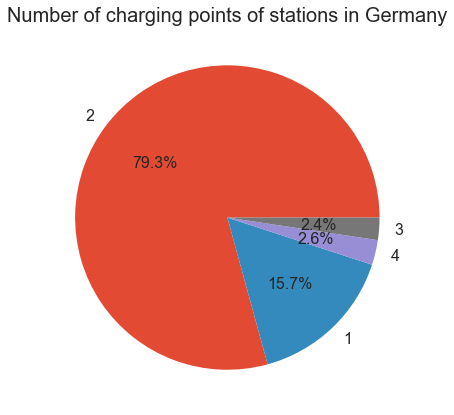

In [352]:
# number of charging points of stations in Germany - pie chart
df['number_of_charging_points'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', fontsize=16)

# labels and title
plt.title('Number of charging points of stations in Germany', fontsize=20)
plt.ylabel('')

Text(0, 0.5, 'Number')

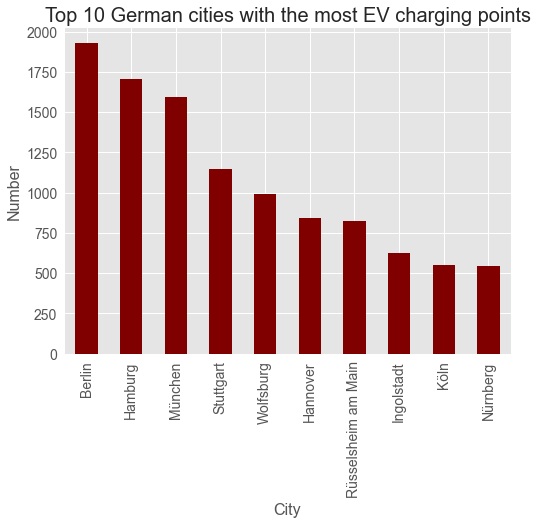

In [354]:
# top 10 German cities with the most EV charging points
df.groupby('Place').sum().number_of_charging_points.sort_values(ascending=False).head(10).plot(kind='bar', color='maroon', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Top 10 German cities with the most EV charging points',fontsize=20)
plt.xlabel('City',fontsize=16)
plt.ylabel('Number',fontsize=16)

Text(0, 0.5, 'Number')

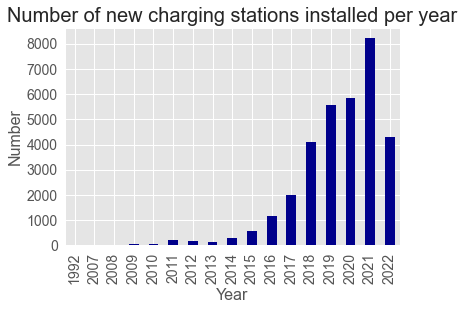

In [358]:
# number of new charging stations installed per year
df['commissioning_date'].dt.year.value_counts().sort_index().plot(kind='bar', color='darkblue')

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of new charging stations installed per year',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number',fontsize=16)

In [355]:
df.columns

Index(['operator', 'Street', 'House_number', 'address_supplement',
       'postal_code', 'Place', 'Federal_State', 'District/district-free_city',
       'latitude', 'longitude', 'commissioning_date', 'connected_load',
       'type_of_charger', 'number_of_charging_points', 'Connector_Types1',
       'P1_[kW]', 'Public_Key1', 'Connector_Types2', 'P2_[kW]', 'Public_Key2',
       'Connector_Types3', 'P3_[kW]', 'Public_Key3', 'Connector_Types4',
       'P4_[kW]', 'Public_Key4'],
      dtype='object')

In [361]:
df['commissioning_date'].dt.year <2000

array([2019, 2014, 2021, 2022, 2020, 2017, 2015, 2018, 2012, 2016, 2011,
       1992, 2013, 2008, 2010, 2009, 2007], dtype=int64)

In [414]:
df.drop(df[df['commissioning_date'].dt.year <2000].index,inplace =True)

Charging Time [h] = Battery Capacity [kwh] / Charging Power [kw]

In [385]:
p1, p2, p3, p4 = df['P1_[kW]'], df['P2_[kW]'], df['P3_[kW]'], df['P4_[kW]']

# serie that contains the power of all charging points in Germany
charging_points = pd.concat([p1, p2, p3, p4])

# remove entries equal to 0 
charging_points = charging_points[charging_points != 0]

# Number of charging points by power of charging points
common = charging_points.value_counts().head(10)
common

22.0     42654
11.0      8831
50.0      2163
150.0     2073
300.0     1951
43.0      1147
350.0      484
3.7        461
75.0       380
250.0      239
dtype: int64

In [386]:
charging_points.head()

0    22.0
1    22.0
2    22.0
3    22.0
4    11.0
dtype: float64

Text(0, 0.5, '')

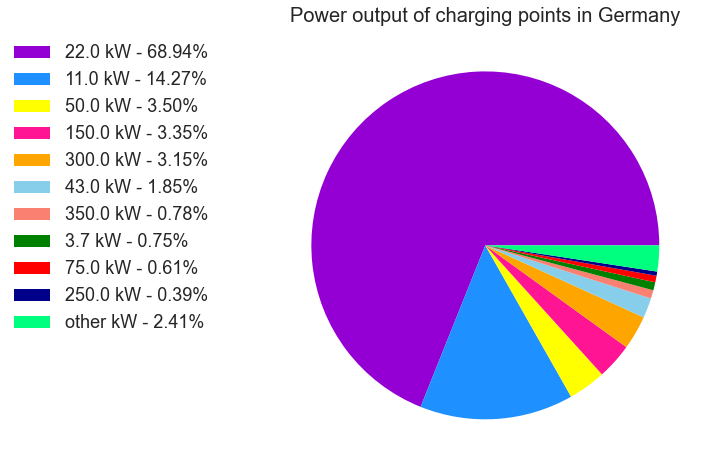

In [387]:
num_charging_points = charging_points.count()
other_power = num_charging_points - common.sum()

# include other in the most common power output serie
common.at['other'] = other_power

# define colors of the pie plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# pie plot showing power output of charging points in Germany
common.plot(kind='pie', figsize=(8, 8), labels=None, colors=colors, fontsize=16)

# legend  - percentage of charging points 
labels = ['{} kW - {:.2%}'.format(index, common.loc[index]/num_charging_points) for index in common.index]
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=18)

# labels and title
plt.title('Power output of charging points in Germany', fontsize=20)
plt.ylabel('')


In [388]:
(charging_points == 300.0).sum()
# 6

# number of charging points of 320 kW in operation 
(charging_points == 320.0).sum()
# 10

# number of charging points of 350 kW in operation 
(charging_points == 350.0).sum()

484

In [391]:
# charging stations with at least one ultra-rapid charging point (>300kW)
ultra_fast_stations = df[(df['P1_[kW]']>=300.0) | (df['P2_[kW]']>=300.0) | (df['P3_[kW]']>=300.0) | (df['P4_[kW]']>=300.0)]

# number of charging stations with at least one ultra-rapid charging point
len(ultra_fast_stations)

1525

Text(0, 0.5, 'Number')

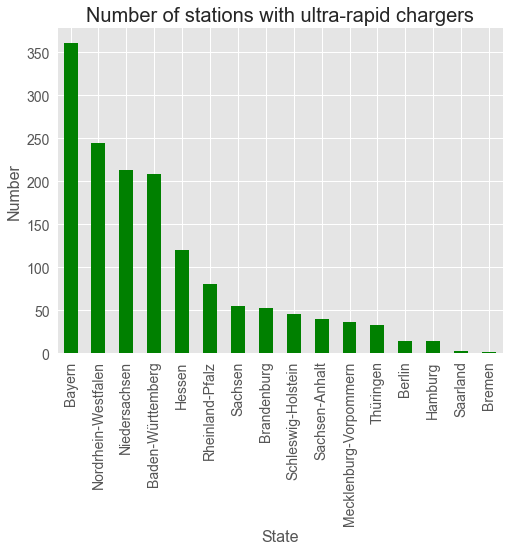

In [393]:
# number of charging station with ultra-rapid charger
ultra_fast_stations.Federal_State.value_counts().plot(kind='bar', color='green', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of stations with ultra-rapid chargers', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

Text(0, 0.5, 'Number')

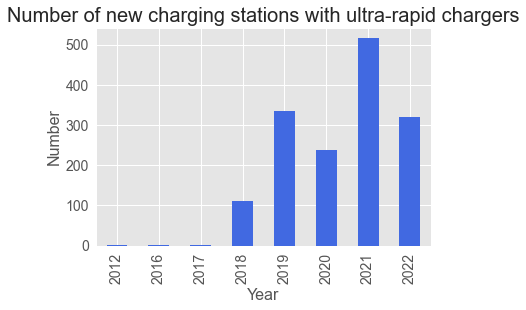

In [394]:
# number of new charging stations with ultra-rapid chargers
ultra_fast_stations['commissioning_date'].dt.year.value_counts().sort_index().plot(kind='bar', color='royalblue')

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of new charging stations with ultra-rapid chargers', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)

In [419]:
print('First charging station:', df['commissioning_date'].min())
# Timestamp('2008-07-19 00:00:00')

# first charging station with an ultra-rapid charging point (>300kW) in Germany.
print('First ultra_fast station:',ultra_fast_stations['commissioning_date'].min())
# Timestamp('2018-03-28 00:00:00')

First charging station: 2007-05-01 00:00:00
First ultra_fast station: 2012-06-16 00:00:00


In [423]:
date_city = df.groupby([df['commissioning_date'].dt.year, 'Place']).count()

# select a column and move the innermost level of the index to the columns
date_cities = date_city.operator.unstack()

# select the most populated cities in germany
date_cities = date_cities[top_cities[0:9]]

date_cities.head()

Place,Berlin,Hamburg,München,Köln,Frankfurt,Essen,Dortmund,Stuttgart,Düsseldorf
commissioning_date,,,,,,,,,
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,23.0,NaN,NaN,NaN,4.0,13.0,10.0,NaN,NaN
2010,14.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN
2011,23.0,NaN,NaN,NaN,NaN,12.0,19.0,NaN,7.0


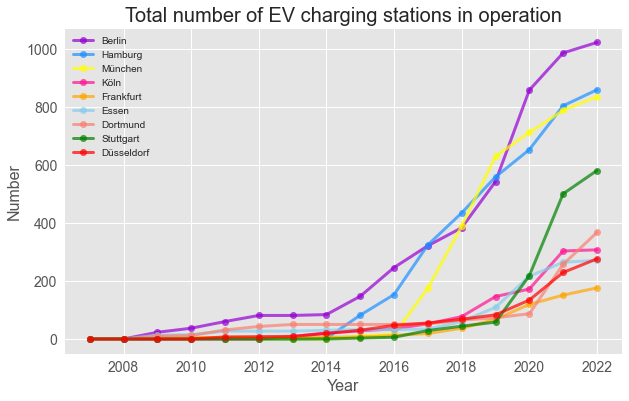

In [425]:
# define the colors for the line plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# line plot showing the total number of EV charging station in operation over the years
date_cities.fillna(0.0).cumsum().plot(color=colors, marker='o', alpha=0.7, linewidth=3, figsize=(10,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# define the title and the labels
plt.title('Total number of EV charging stations in operation', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.legend(loc='upper left')

In [473]:
import folium

# define a map centered around Munich
berlin_map = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# display the map
berlin_map

In [474]:
# data frame containing only the charging stations located in Munich
df_berlin = df[df['Place'] == 'Berlin']

# create a map object of the city of Munich
berlin_markers = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# display charging stations using circle markers
for lat, lng in zip(df_berlin['latitude'], df_berlin['longitude']):
    folium.CircleMarker(
            [lat, lng],
            radius=4,
            color='purple',
            opacity=0.4,
            fill=True,
            fill_color='blue').add_to(berlin_markers)
    
berlin_markers

In [475]:
# number of charging points of stations in Berlin - percentage
df_berlin.number_of_charging_points.value_counts(normalize=True)*100

2    78.354554
1    16.944172
3     3.428012
4     1.273262
Name: number_of_charging_points, dtype: float64

In [476]:
# create a map object of the city of Munich
berlin_markers_2 = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# define colors for the markers
colors = ['red', 'purple', 'orange', 'blue']

# display charging stations using circle markers
for lat, lng, number in zip(df_berlin['latitude'], df_berlin['longitude'], df_berlin['number_of_charging_points']):
    folium.CircleMarker(
            [lat, lng],
            radius=number*2,
            color=colors[number-1],
            opacity=0.5,
            fill=True,
            fill_color='blue').add_to(berlin_markers_2)
    
berlin_markers_2

In [477]:

# type of chargers - normal or fast
df.type_of_charger.unique()
# array(['fast', 'normal'], dtype=object)

# a charging station is considered fast if contains at least 1 charging point with a power output larger than 22kw
df[df.type_of_charger == 'Fast'][['P1_[kW]', 'P2_[kW]', 'P3_[kW]', 'P4_[kW]']].max(axis=1).unique()

array([ 50. ,  75. , 320. , 150. , 230. ,  62.5, 300. , 100. ,  60. ,
       250. , 350. ,  24. ,  25. , 360. , 125. , 175. , 160. , 225. ,
       135. ,  45. ,  55. ,  53. ,  23. , 180. ,  78. ,  80. , 200. ,
        32. , 120. ,  70. ,  44. ,  30. ,  43. ,  36. ,  62. , 144. ,
        65. ,  22. , 112.5, 163. ,  22.2,  90. , 130. ,  35. , 140. ,
       134. ,  72. ,  27. , 280. ,  40. ,  39. ,  99. , 145. , 110. ,
        98. ,  76.5,  22.1, 149. ])

In [478]:
# number of charging stations with at least one charging point with a power output >22kw
len(df_berlin[df_berlin.type_of_charger == 'Fast'])

112

In [480]:
df.columns

Index(['operator', 'Street', 'House_number', 'address_supplement',
       'postal_code', 'Place', 'Federal_State', 'District/district-free_city',
       'latitude', 'longitude', 'commissioning_date', 'connected_load',
       'type_of_charger', 'number_of_charging_points', 'Connector_Types1',
       'P1_[kW]', 'Public_Key1', 'Connector_Types2', 'P2_[kW]', 'Public_Key2',
       'Connector_Types3', 'P3_[kW]', 'Public_Key3', 'Connector_Types4',
       'P4_[kW]', 'Public_Key4'],
      dtype='object')

In [514]:
df['operator'].value_counts().head(150)

EnBW mobility+ AG und Co.KG      1941
Charge-ON GmbH                   1154
Allego GmbH                      1056
EWE Go GmbH                       765
Westenergie Metering GmbH         722
                                 ... 
ZEAG Energie AG                    30
NEW AG                             30
SWE Energie GmbH                   30
WEVG Salzgitter GmbH & Co.KG       29
Energieversorgung Rodgau GmbH      29
Name: operator, Length: 150, dtype: int64

In [509]:
df.Federal_State[df.operator=='EnBW mobility+ AG und Co.KG'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [521]:
type_1 = df['Connector_Types1']
type_2 = df['Connector_Types2']
type_3 = df['Connector_Types3']
type_4 = df['Connector_Types4']

In [523]:
all_types = pd.concat([type_1,type_2,type_3,type_4])

In [537]:
type_2.value_counts()

AC Steckdose Typ 2                                                                  20223
0                                                                                    5131
DC Kupplung Combo                                                                    2248
AC Steckdose Typ 2, AC Schuko                                                        1972
DC Kupplung Combo, DC CHAdeMO                                                        1341
AC Kupplung Typ 2                                                                    1142
AC Steckdose Typ 2, AC Kupplung Typ 2                                                 329
AC Schuko                                                                              65
AC Kupplung Typ 2, DC CHAdeMO                                                          54
AC Kupplung Typ 2, DC Kupplung Combo                                                   39
AC Steckdose Typ 2, DC Kupplung Combo                                                  35
AC Steckdo

In [526]:
all_types.value_counts()

0                                                                                   67990
AC Steckdose Typ 2                                                                  44190
DC Kupplung Combo                                                                    6342
AC Steckdose Typ 2, AC Schuko                                                        4274
AC Kupplung Typ 2                                                                    3592
DC Kupplung Combo, DC CHAdeMO                                                        2675
AC Steckdose Typ 2, AC Kupplung Typ 2                                                 916
AC Schuko                                                                             152
AC Kupplung Typ 2, DC CHAdeMO                                                         117
AC Steckdose Typ 2, DC Kupplung Combo, DC CHAdeMO                                      87
AC Kupplung Typ 2, DC Kupplung Combo                                                   63
AC Steckdo